In [27]:
import pandas as pd

# Read the All_cancer_rate CSV file, specifying only the columns to keep   
df = pd.read_csv("../Cancer_Cartographers/Source_Data/All_Cancer_Rates_US_Counties_2017-2021.csv")

print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        3168 non-null   object 
 1   FIPS                                                          3144 non-null   float64
 2   2023 Rural-Urban Continuum Codes([rural urban note])          3143 non-null   object 
 3   Age-Adjusted Incidence Rate([rate note]) - cases per 100,000  3144 non-null   object 
 4   Lower 95% Confidence Interval                                 3144 non-null   object 
 5   Upper 95% Confidence Interval                                 3144 non-null   object 
 6   CI*Rank([rank note])                                          3144 non-null   object 
 7   Lower CI (CI*Rank)                                            3144 no

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0.0,NaN,444.4,444.1,444.7,N/A,N/A,N/A,1744459,falling,-0.5,-0.7,-0.3
1,"Union County, Florida(6)",12125.0,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
2,"Traverse County, Minnesota(6)",27155.0,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
3,"Polk County, Texas(7)",48373.0,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
4,"Galax City, Virginia(6)",51640.0,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4


In [39]:
# Columns to keep
columns_to_keep = ["County", "FIPS", "Average Annual Count"]
    
# Drop all other columns
df_filtered = df[columns_to_keep]
    
print(df_filtered)
print(df_filtered.describe())
df_filtered.head()

                                                 County     FIPS  \
0                                     US (SEER+NPCR)(1)      0.0   
1                              Union County, Florida(6)  12125.0   
2                         Traverse County, Minnesota(6)  27155.0   
3                                 Polk County, Texas(7)  48373.0   
4                               Galax City, Virginia(6)  51640.0   
...                                                 ...      ...   
3174                                                NaN      NaN   
3175  Note: This website still uses Connecticut coun...      NaN   
3176                                                NaN      NaN   
3177  Data for the United States does not include da...      NaN   
3178  Data for the United States does not include Pu...      NaN   

     Average Annual Count  
0                 1744459  
1                     245  
2                      37  
3                     436  
4                      55  
...            

,County,FIPS,Average Annual Count
0,US (SEER+NPCR)(1),0.0,1744459
1,"Union County, Florida(6)",12125.0,245
2,"Traverse County, Minnesota(6)",27155.0,37
3,"Polk County, Texas(7)",48373.0,436
4,"Galax City, Virginia(6)",51640.0,55


In [40]:
# Split the 'County' column into 'County' and 'State'
# Split the 'County' column into 'County' and 'State'
split_df = df_filtered['County'].str.split(', ', expand=True)
df_filtered['County'] = split_df[0]
df_filtered['State'] = split_df[1].str.extract(r'([A-Za-z\s]+)')

print(df_filtered)


                                                 County     FIPS  \
0                                     US (SEER+NPCR)(1)      0.0   
1                                          Union County  12125.0   
2                                       Traverse County  27155.0   
3                                           Polk County  48373.0   
4                                            Galax City  51640.0   
...                                                 ...      ...   
3174                                                NaN      NaN   
3175  Note: This website still uses Connecticut coun...      NaN   
3176                                                NaN      NaN   
3177  Data for the United States does not include da...      NaN   
3178  Data for the United States does not include Pu...      NaN   

     Average Annual Count                                        State  
0                 1744459                                          NaN  
1                     245            

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_75043/3014019840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['County'] = split_df[0]
/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_75043/3014019840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = split_df[1].str.extract(r'([A-Za-z\s]+)')


In [41]:
df_filtered.head()

,County,FIPS,Average Annual Count,State
0,US (SEER+NPCR)(1),0.0,1744459,NaN
1,Union County,12125.0,245,Florida
2,Traverse County,27155.0,37,Minnesota
3,Polk County,48373.0,436,Texas
4,Galax City,51640.0,55,Virginia


In [62]:
df_filtered_cleaned = df_filtered.dropna(subset=['County', 'State'])

print(df_filtered_cleaned)
df_filtered_cleaned.head()

                                                 County     FIPS  \
1                                          Union County  12125.0   
2                                       Traverse County  27155.0   
3                                           Polk County  48373.0   
4                                            Galax City  51640.0   
5                                        Greeley County  31077.0   
...                                                 ...      ...   
3165  [rank note]Results presented with the CI*Rank ...      NaN   
3168  * Data has been suppressed to ensure confident...      NaN   
3170  1 Source: National Program of Cancer Registrie...      NaN   
3171  6 Source: National Program of Cancer Registrie...      NaN   
3175  Note: This website still uses Connecticut coun...      NaN   

     Average Annual Count                                              State  
1                     245                                            Florida  
2                      37

,County,FIPS,Average Annual Count,State
1,Union County,12125.0,245,Florida
2,Traverse County,27155.0,37,Minnesota
3,Polk County,48373.0,436,Texas
4,Galax City,51640.0,55,Virginia
5,Greeley County,31077.0,21,Nebraska


In [63]:
cleaned_csv_path = "cleaned_all_cancer_data.csv"  # Define the path and name of the new CSV
df_filtered_cleaned.to_csv(cleaned_csv_path, index=False)

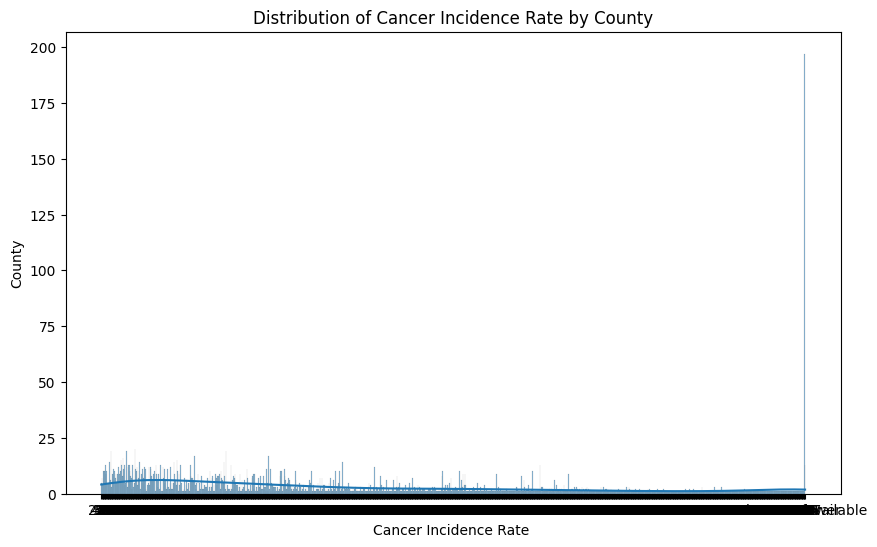

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt



# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered_cleaned, x='Average Annual Count', bins=10, kde=True)

# Add labels and title
plt.xlabel('Cancer Incidence Rate ')
plt.ylabel('County')
plt.title('Distribution of Cancer Incidence Rate by County')

# Show plot
plt.show()


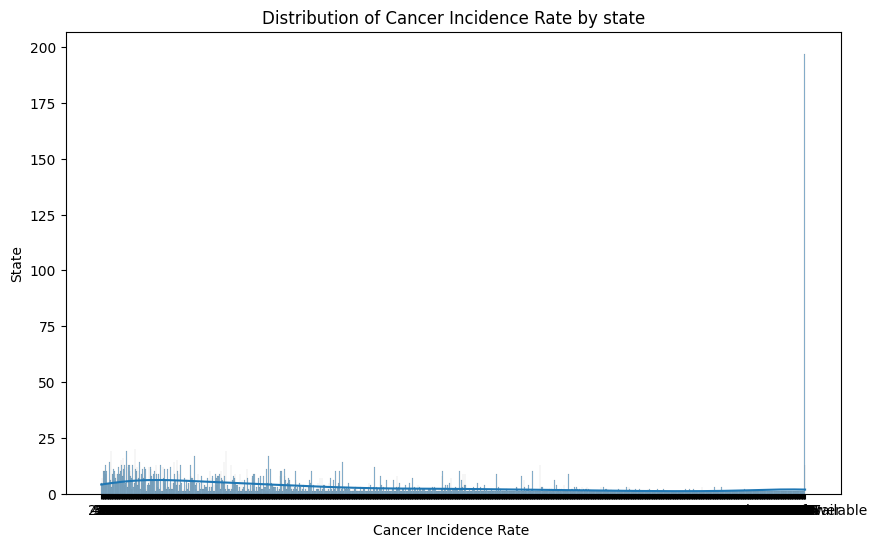

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered_cleaned, x='Average Annual Count', bins=10, kde=True)

# Add labels and title
plt.xlabel('Cancer Incidence Rate ')
plt.ylabel('State')
plt.title('Distribution of Cancer Incidence Rate by state')

# Show plot
plt.show()

In [29]:
# Read the All_cancer_rate CSV file, specifying only the columns to keep   
df1 = pd.read_csv("../Cancer_Cartographers/Source_Data/Breast_Cancer_Rates_US_Counties_2017-2021.csv")

print(df1.info())
print(df1.describe())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        3168 non-null   object 
 1   FIPS                                                          3144 non-null   float64
 2   2023 Rural-Urban Continuum Codes([rural urban note])          3143 non-null   object 
 3   Age-Adjusted Incidence Rate([rate note]) - cases per 100,000  3144 non-null   object 
 4   Lower 95% Confidence Interval                                 3144 non-null   object 
 5   Upper 95% Confidence Interval                                 3144 non-null   object 
 6   CI*Rank([rank note])                                          3144 non-null   object 
 7   Lower CI (CI*Rank)                                            3144 no

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0.0,NaN,129.8,129.5,130,N/A,N/A,N/A,258398,rising,0.6,0.4,0.8
1,"Armstrong County, Texas(7)",48011.0,Urban,279.6,152.3,473.3,N/A,N/A,N/A,3,*,*,*,*
2,"Aurora County, South Dakota(6)",46003.0,Rural,265.3,160,416.1,N/A,N/A,N/A,5,rising,18.4,5.4,50.1
3,"Webster County, Georgia(7)",13307.0,Rural,248,143.6,404.6,N/A,N/A,N/A,4,*,*,*,*
4,"Haakon County, South Dakota(6)",46055.0,Rural,233.5,121.8,412.6,N/A,N/A,N/A,3,*,*,*,*


In [30]:
# Columns to keep
columns_to_keep = ["County", "FIPS", "Average Annual Count"]
    
# Drop all other columns
df1_filtered = df1[columns_to_keep]
    
print(df1_filtered)
print(df1_filtered.describe())
df1_filtered.head()

                                                 County     FIPS  \
0                                     US (SEER+NPCR)(1)      0.0   
1                            Armstrong County, Texas(7)  48011.0   
2                        Aurora County, South Dakota(6)  46003.0   
3                            Webster County, Georgia(7)  13307.0   
4                        Haakon County, South Dakota(6)  46055.0   
...                                                 ...      ...   
3174                                                NaN      NaN   
3175  Note: This website still uses Connecticut coun...      NaN   
3176                                                NaN      NaN   
3177  Data for the United States does not include da...      NaN   
3178  Data for the United States does not include Pu...      NaN   

     Average Annual Count  
0                  258398  
1                       3  
2                       5  
3                       4  
4                       3  
...            

,County,FIPS,Average Annual Count
0,US (SEER+NPCR)(1),0.0,258398
1,"Armstrong County, Texas(7)",48011.0,3
2,"Aurora County, South Dakota(6)",46003.0,5
3,"Webster County, Georgia(7)",13307.0,4
4,"Haakon County, South Dakota(6)",46055.0,3


In [44]:
# Split the 'County' column into 'County' and 'State'
split_df1 = df1_filtered['County'].str.split(', ', expand=True)
df1_filtered['County'] = split_df1[0]
df1_filtered['State'] = split_df1[1].str.extract(r'([A-Za-z\s]+)')

print(df1_filtered)


                                                 County     FIPS  \
0                                     US (SEER+NPCR)(1)      0.0   
1                                      Armstrong County  48011.0   
2                                         Aurora County  46003.0   
3                                        Webster County  13307.0   
4                                         Haakon County  46055.0   
...                                                 ...      ...   
3174                                                NaN      NaN   
3175  Note: This website still uses Connecticut coun...      NaN   
3176                                                NaN      NaN   
3177  Data for the United States does not include da...      NaN   
3178  Data for the United States does not include Pu...      NaN   

     Average Annual Count                                        State  
0                  258398                                          NaN  
1                       3            

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_75043/424486342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['County'] = split_df1[0]
/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_75043/424486342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['State'] = split_df1[1].str.extract(r'([A-Za-z\s]+)')


In [46]:
df1_filtered.head()

,County,FIPS,Average Annual Count,State
0,US (SEER+NPCR)(1),0.0,258398,NaN
1,Armstrong County,48011.0,3,Texas
2,Aurora County,46003.0,5,South Dakota
3,Webster County,13307.0,4,Georgia
4,Haakon County,46055.0,3,South Dakota


In [53]:
# Drop rows where 'County' or 'State' columns have NaN values
df1_filtered_cleaned = df1_filtered.dropna(subset=['County', 'State'])

print(df1_filtered_cleaned)

                                                 County     FIPS  \
1                                      Armstrong County  48011.0   
2                                         Aurora County  46003.0   
3                                        Webster County  13307.0   
4                                         Haakon County  46055.0   
5                                       Traverse County  27155.0   
...                                                 ...      ...   
3165  [rank note]Results presented with the CI*Rank ...      NaN   
3168  * Data has been suppressed to ensure confident...      NaN   
3170  1 Source: National Program of Cancer Registrie...      NaN   
3171  6 Source: National Program of Cancer Registrie...      NaN   
3175  Note: This website still uses Connecticut coun...      NaN   

     Average Annual Count                                              State  
1                       3                                              Texas  
2                       5

In [54]:
df1_filtered_cleaned.head()

,County,FIPS,Average Annual Count,State
1,Armstrong County,48011.0,3,Texas
2,Aurora County,46003.0,5,South Dakota
3,Webster County,13307.0,4,Georgia
4,Haakon County,46055.0,3,South Dakota
5,Traverse County,27155.0,5,Minnesota


In [66]:
cleaned_csv_path1 = "cleaned_Breast_Cancer_data.csv"  # Define the path and name of the new CSV
df1_filtered_cleaned.to_csv(cleaned_csv_path1, index=False)

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_75043/1782145533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered_cleaned['Average Annual Count'] = pd.to_numeric(df1_filtered_cleaned['Average Annual Count'], errors='coerce')


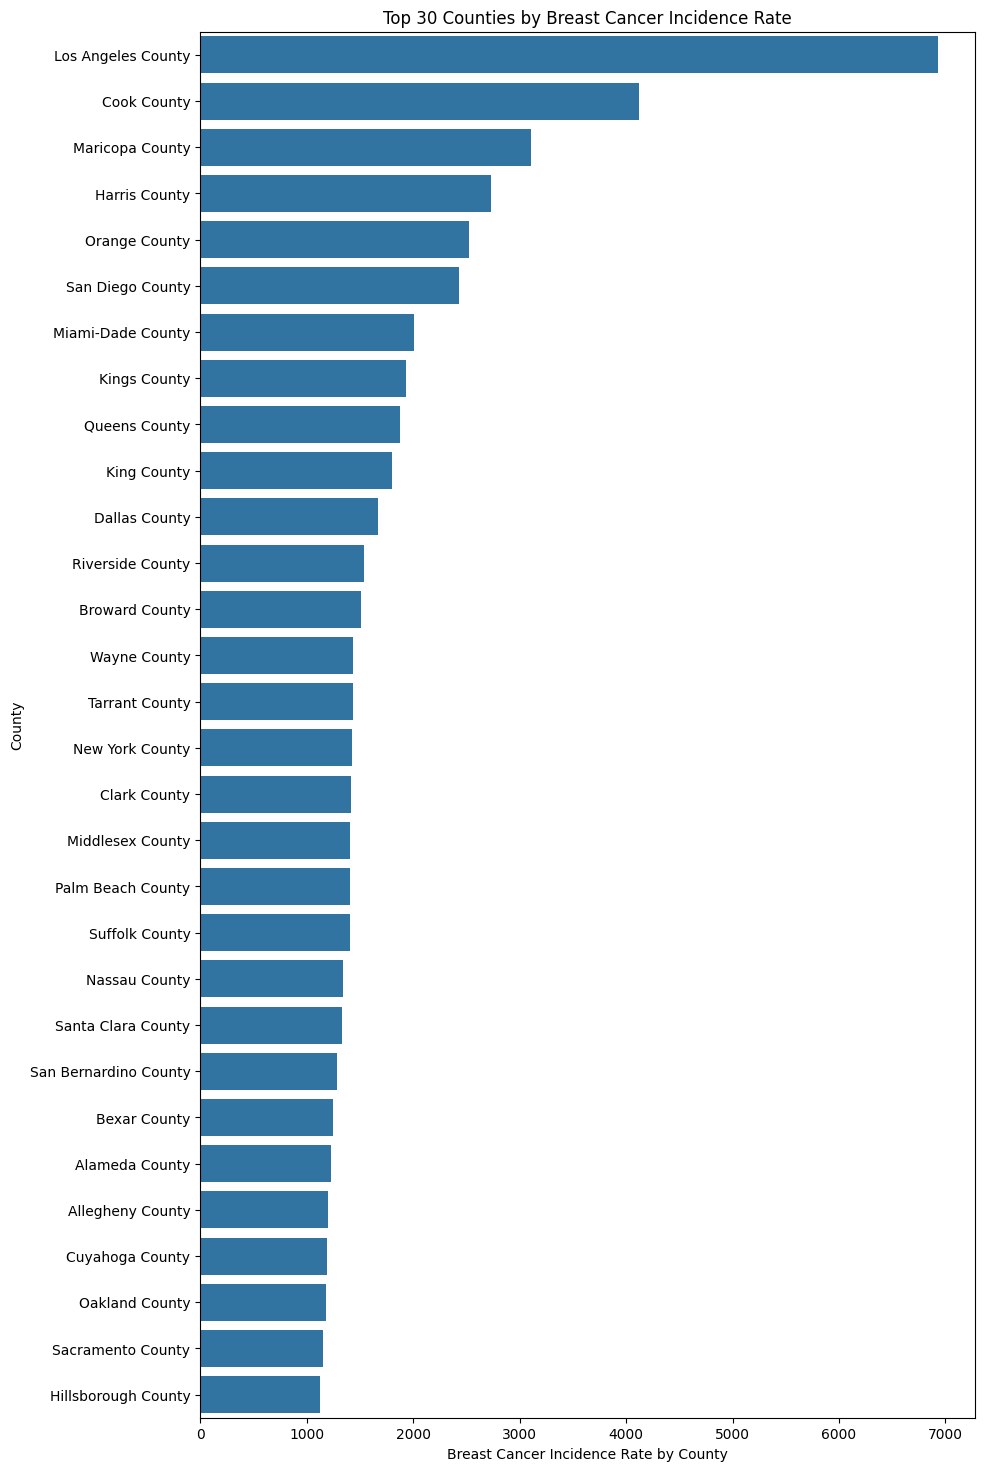

In [69]:
# Replace non-numeric values with NaN and then drop them
df1_filtered_cleaned['Average Annual Count'] = pd.to_numeric(df1_filtered_cleaned['Average Annual Count'], errors='coerce')
df1_filtered_cleaned = df1_filtered_cleaned.dropna(subset=['Average Annual Count'])

# Sort the DataFrame by 'Average Annual Count' and get the  top 30 counties

top_30_counties = df1_filtered_cleaned.nlargest(30, 'Average Annual Count')
# Plot for Top 30 Counties
plt.figure(figsize=(10, 18))  # Adjust the figure size to accommodate more counties
sns.barplot(x='Average Annual Count', y='County', data=top_30_counties)
plt.xlabel('Breast Cancer Incidence Rate by County')
plt.ylabel('County')
plt.title('Top 30 Counties by Breast Cancer Incidence Rate')
plt.show()



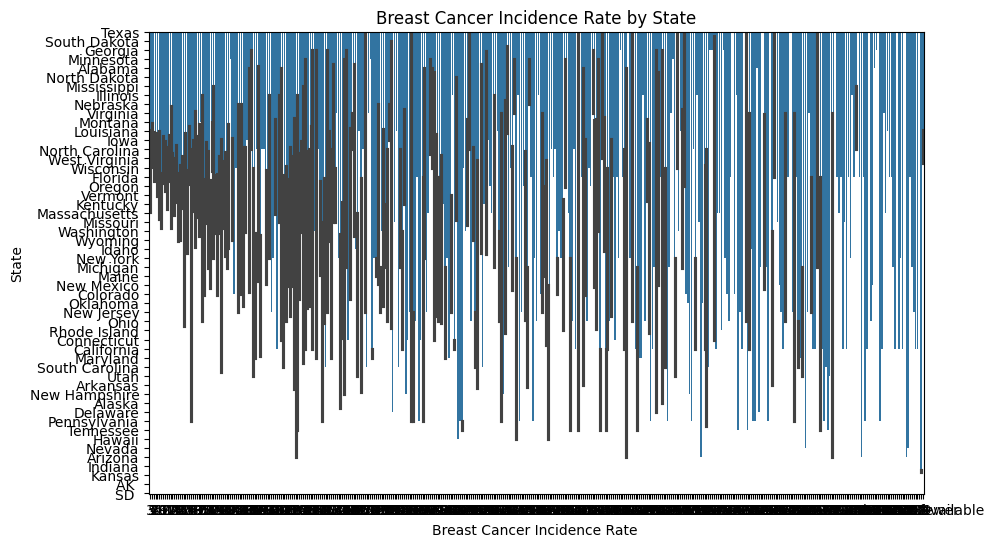

In [56]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Annual Count', y='State', data=df1_filtered_cleaned)

# Add labels and title
plt.xlabel('Breast Cancer Incidence Rate ')
plt.ylabel('State')
plt.title('Breast Cancer Incidence Rate by State')

# Show plot
plt.show()

code in the above by APARAJITA
code below by Tutor

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df1_filtered, x='Average Annual Count', bins=10, kde=True)

# Add labels and title
plt.xlabel('Cancer Incidence Rate')
plt.ylabel('Count')
plt.title('Distribution of Breast Cancer Incidence Rate By County')

# Show plot
plt.show()

In [2]:
df_cleaned = df.dropna()
df_cleaned.head()

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,"Union County, Florida(6)",12125.0,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
2,"Traverse County, Minnesota(6)",27155.0,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
3,"Polk County, Texas(7)",48373.0,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
4,"Galax City, Virginia(6)",51640.0,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4
5,"Greeley County, Nebraska(6)",31077.0,Rural,653.1,519.4,812.5,N/A,N/A,N/A,21,stable,0.7,-2.3,3.6


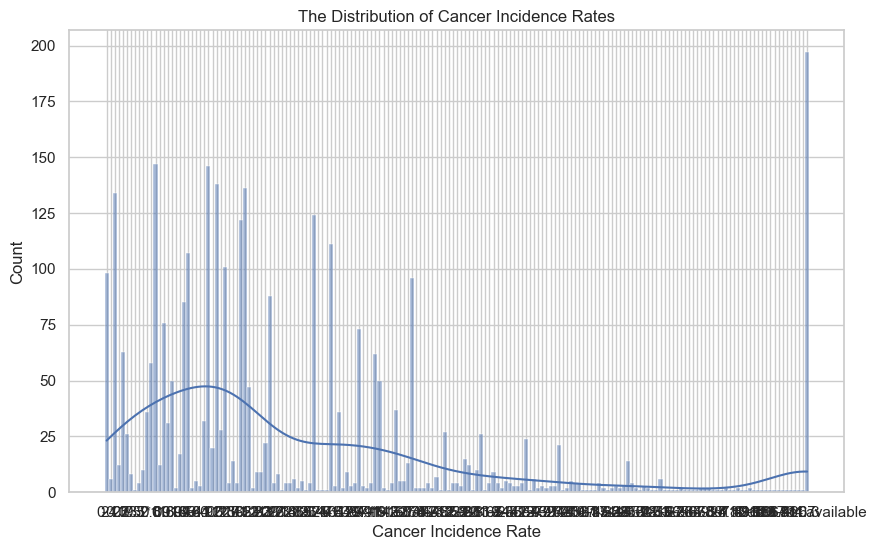

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize =(10,6))
sns.histplot(df_cleaned["Recent 5-Year Trend ([trend note]) in Incidence Rates"], bins=30, kde = True)
plt.title("The Distribution of Cancer Incidence Rates")
plt.xlabel("Cancer Incidence Rate")
plt.ylabel("Count")
plt.show()


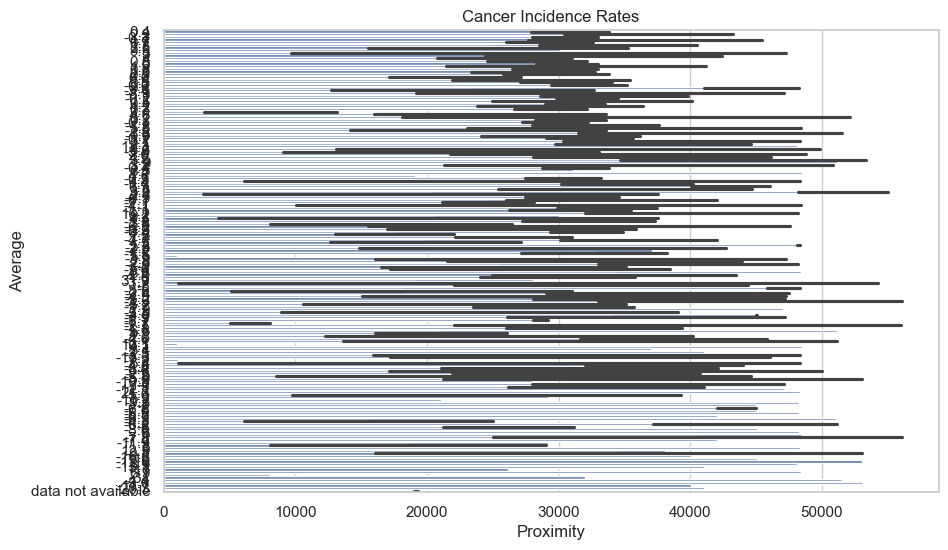

In [5]:
plt.figure(figsize =(10,6))
sns.barplot(x='FIPS', y='Recent 5-Year Trend ([trend note]) in Incidence Rates', data=df_cleaned)  #debug
plt.title("Cancer Incidence Rates")
plt.xlabel("Proximity")
plt.ylabel("Average")
plt.show()

In [9]:
Heatmap_data = df_cleaned.pivot_table(index="County", columns= "FIPS",values="Recent 5-Year Trend ([trend note]) in Incidence Rates", aggfunc=)

plt.figure(figsize =(12,8))
sns.heatmap(Heatmap_data, annot=True, cmap="coolwarm", fmt=".1f")  
plt.title("Average Cancer Incidence Rates")
plt.xlabel("Proximity")
plt.ylabel("County")
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

In [11]:
# Create the pivot table
Heatmap_data = df_cleaned.pivot_table(
    index="County", 
    columns="FIPS", 
    values="Recent 5-Year Trend ([trend note]) in Incidence Rates", 
    aggfunc='mean'  # Use 'mean' to aggregate data
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Heatmap_data, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Average Cancer Incidence Rates by County and FIPS Code")
plt.xlabel("FIPS Code")
plt.ylabel("County")
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [4]:
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
folium.Choropleth(geo_data=geojson_url,
 name='choropleth', 
 data=df, 
 columns=['FIPS', 'Incidence_Rate'], 
 key_on='feature.id', # Feature.id for FIPS matching 
 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, legend_name='Age-Adjusted Incidence Rate (per 100,000)', ).add_to(usa_map)




In [6]:
Marker_cluster = MarkerCluster().add_to(usa_map)

for index, row in All_cancer.iterrows():
    folium.Marker(
        location = [row["county"], row["fips"]],
        popup = f"Plant: {row['Plant_Name']}\nState: {row['State']}",
        icon = folium.Icon(color="red", icon="info-sign")
    ).add_to(Marker_cluster)

usa_map



KeyError: 'county'